C:\Users\googl\AppData\Local\Temp\ipykernel_24516\765992030.py:53: RuntimeWarning: overflow encountered in scalar multiply
  dbacteria_dt = r_bacteria * bacteria * (mice + locust + snake + bat + spider + eagle) - rice - sedge
C:\Users\googl\AppData\Local\Temp\ipykernel_24516\765992030.py:64: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  solution = odeint(model, initial_conditions, t)


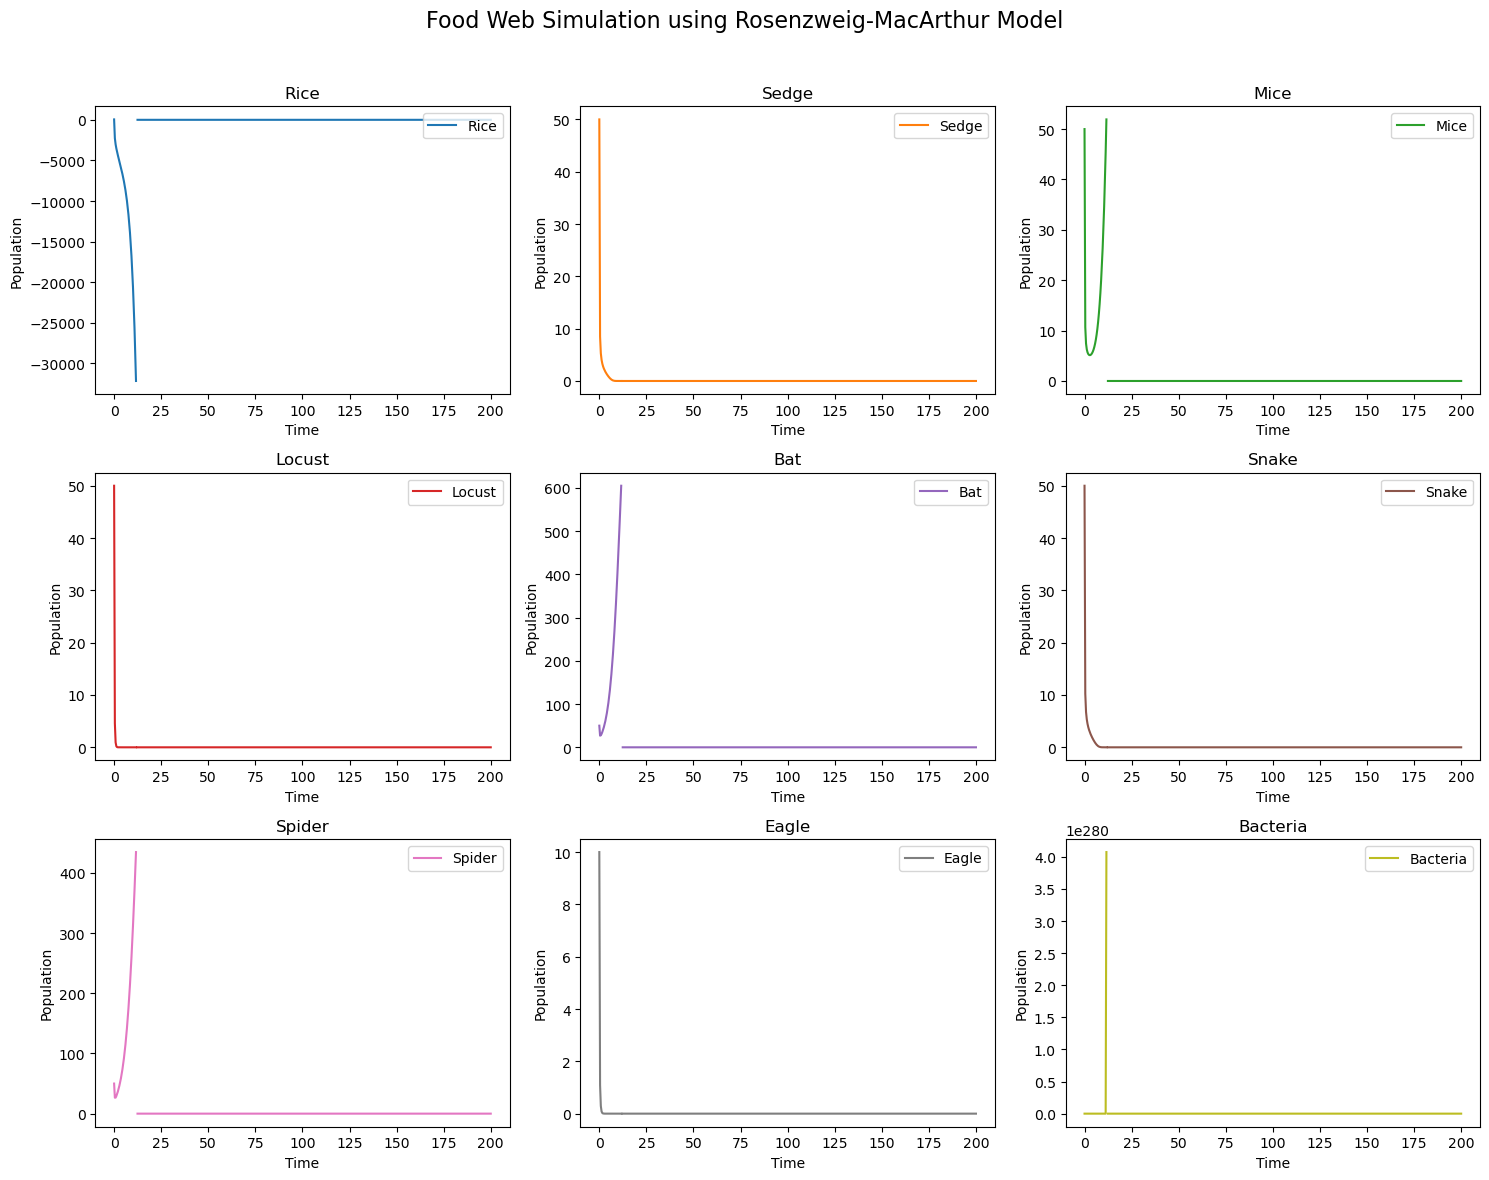

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the parameters with adjusted values
r_rice = 0.6  # growth rate of rice
r_sedge = 0.4  # growth rate of sedge
K_rice = 1200  # carrying capacity of rice
K_sedge = 1000  # carrying capacity of sedge

# Consumer parameters
a_mice = 0.15  # attack rate of mice on rice and sedge
a_locust = 0.12  # attack rate of locust on rice and sedge
r_mice = 0.35  # growth rate of mice
r_locust = 0.25  # growth rate of locust

# Predator parameters
a_bat = 0.12  # attack rate of bats on locust
a_snake = 0.12  # attack rate of snake on mice and locust
a_spider = 0.12  # attack rate of spider on locust
r_bat = 0.35  # growth rate of bat
r_snake = 0.28  # growth rate of snake
r_spider = 0.3  # growth rate of spider

# Top predator parameters
a_eagle = 0.08  # attack rate of eagle on snake, spider, and mice
r_eagle = 0.15  # growth rate of eagle

# Bacteria parameters
r_bacteria = 0.15  # decay rate of bacteria

# Time parameters
T = 40  # time step for field harvesting and replanting
num_cycles = 5  # number of cycles for planting and harvesting

# Differential equations for the food web model
def model(y, t):
    rice, sedge, mice, locust, bat, snake, spider, eagle, bacteria = y

    # Agricultural process (field clearing, replanting)
    if t % (2*T) < T:
        rice = K_rice  # rice is at its carrying capacity after planting

    # Growth equations and interactions
    drice_dt = r_rice * rice * (1 - rice / K_rice) - a_mice * mice * rice - a_locust * locust * rice
    dsedge_dt = r_sedge * sedge * (1 - sedge / K_sedge) - a_mice * mice * sedge - a_locust * locust * sedge
    dmice_dt = r_mice * mice * (1 - mice / K_rice) - a_snake * snake * mice - a_locust * locust * mice
    dlocust_dt = r_locust * locust * (1 - locust / K_sedge) - a_bat * bat * locust - a_snake * snake * locust
    dbat_dt = r_bat * bat * (1 - bat / K_rice) - a_bat * bat * locust
    dsnake_dt = r_snake * snake * (1 - snake / K_rice) - a_snake * snake * mice - a_snake * snake * locust
    dspider_dt = r_spider * spider * (1 - spider / K_rice) - a_spider * spider * locust
    deagle_dt = r_eagle * eagle * (1 - eagle / K_rice) - a_eagle * eagle * (snake + spider + mice)
    dbacteria_dt = r_bacteria * bacteria * (mice + locust + snake + bat + spider + eagle) - rice - sedge

    return [drice_dt, dsedge_dt, dmice_dt, dlocust_dt, dbat_dt, dsnake_dt, dspider_dt, deagle_dt, dbacteria_dt]

# Initial conditions for the populations
initial_conditions = [50, 50, 50, 50, 50, 50, 50, 10, 50]  # initial populations for each species

# Time points to solve the differential equations
t = np.linspace(0, T * num_cycles, 500)

# Solve the differential equations
solution = odeint(model, initial_conditions, t)

# Organize the plots
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Food Web Simulation using Rosenzweig-MacArthur Model', fontsize=16)

species = ['Rice', 'Sedge', 'Mice', 'Locust', 'Bat', 'Snake', 'Spider', 'Eagle', 'Bacteria']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']

for i in range(9):
    ax = axs[i // 3, i % 3]
    ax.plot(t, solution[:, i], label=species[i], color=colors[i])
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')
    ax.set_title(species[i])
    ax.legend(loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust space for the title
plt.show()

C:\Users\googl\AppData\Local\Temp\ipykernel_24516\1809078350.py:53: RuntimeWarning: overflow encountered in scalar multiply
  dbacteria_dt = r_bacteria * bacteria * (mice + locust + snake + bat + spider + eagle) - rice - sedge
C:\Users\googl\AppData\Local\Temp\ipykernel_24516\1809078350.py:64: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  solution = odeint(model, initial_conditions, t)


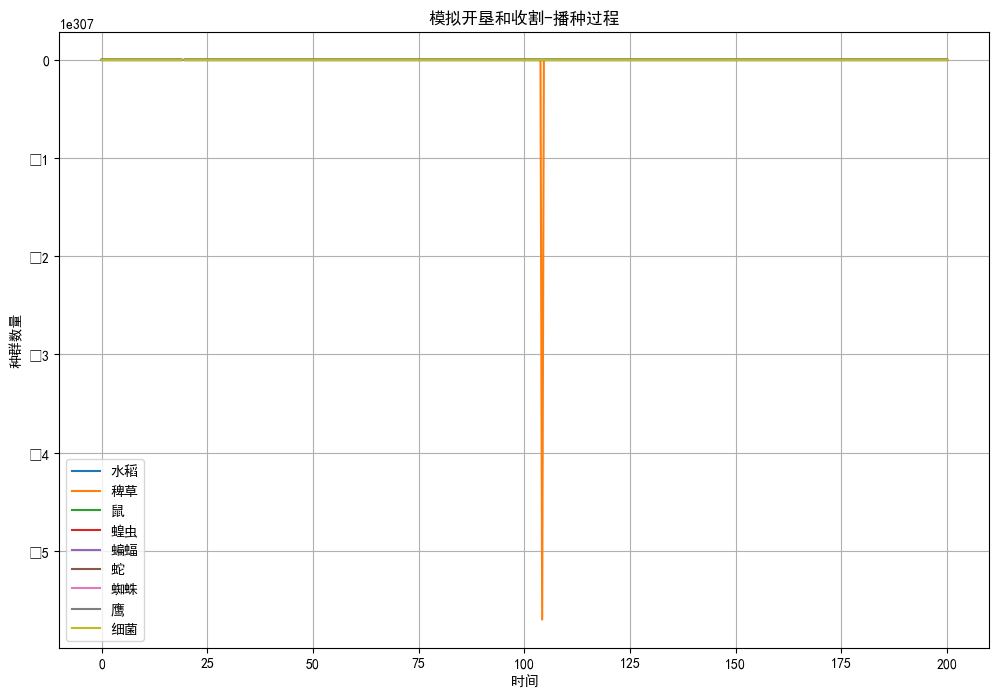

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams['font.family'] = 'SimHei'
# 定义参数
r_rice = 0.6
r_sedge = 0.4
K_rice = 1200
K_sedge = 1000

# 消费者参数
a_mice = 0.15
a_locust = 0.12
r_mice = 0.35
r_locust = 0.25

# 捕食者参数
a_bat = 0.12
a_snake = 0.12
a_spider = 0.12
r_bat = 0.35
r_snake = 0.28
r_spider = 0.3

# 最高捕食者参数
a_eagle = 0.08
r_eagle = 0.15

# 细菌参数
r_bacteria = 0.15

# 时间参数
T = 40
num_cycles = 5

# 微分方程模型
def model(y, t):
    rice, sedge, mice, locust, bat, snake, spider, eagle, bacteria = y

    # 开垦与收割过程
    if t % (2 * T) < T:
        rice = K_rice

    # 种群变化微分方程
    drice_dt = r_rice * rice * (1 - rice / K_rice) - a_mice * mice * rice - a_locust * locust * rice
    dsedge_dt = r_sedge * sedge * (1 - sedge / K_sedge) - a_mice * mice * sedge - a_locust * locust * sedge
    dmice_dt = r_mice * mice * (1 - mice / K_rice) - a_snake * snake * mice - a_locust * locust * mice
    dlocust_dt = r_locust * locust * (1 - locust / K_sedge) - a_bat * bat * locust - a_snake * snake * locust
    dbat_dt = r_bat * bat * (1 - bat / K_rice) - a_bat * bat * locust
    dsnake_dt = r_snake * snake * (1 - snake / K_rice) - a_snake * snake * mice - a_snake * snake * locust
    dspider_dt = r_spider * spider * (1 - spider / K_rice) - a_spider * spider * locust
    deagle_dt = r_eagle * eagle * (1 - eagle / K_rice) - a_eagle * eagle * (snake + spider + mice)
    dbacteria_dt = r_bacteria * bacteria * (mice + locust + snake + bat + spider + eagle) - rice - sedge

    return [drice_dt, dsedge_dt, dmice_dt, dlocust_dt, dbat_dt, dsnake_dt, dspider_dt, deagle_dt, dbacteria_dt]

# 初始种群
initial_conditions = [100, 100, 50, 50, 20, 20, 20, 5, 50]

# 时间点
t = np.linspace(0, T * num_cycles, 500)

# 解算微分方程
solution = odeint(model, initial_conditions, t)


# 绘制结果
plt.figure(figsize=(12, 8))
labels = ['水稻', '稗草', '鼠', '蝗虫', '蝙蝠', '蛇', '蜘蛛', '鹰', '细菌']
for i in range(9):
    plt.plot(t, solution[:, i], label=labels[i])

plt.xlabel('时间')
plt.ylabel('种群数量')
plt.title('模拟开垦和收割-播种过程')
plt.legend()
plt.grid()
plt.show()